In [1]:
# Loading the dataset
# Importing pandas library
import pandas as pd
# Reading the dataset
mydata = pd.read_csv('E:/SLTechDocs/Data/Flood.csv')

In [2]:
mydata

,Time,Area,RH,ET,P,AT,SM,GHF
0,1/1/2005,3563530.00,65.396004,0.000003,3.757262,12.265436,1.301278,17.165691
1,1/2/2005,3474497.25,68.874268,0.000002,4.382504,13.751855,1.320082,18.168137
2,1/3/2005,3467959.75,77.067459,0.000004,17.027948,10.879114,1.377332,1.645442
3,1/4/2005,3605078.50,73.839661,0.000005,40.451202,6.159296,1.406343,-8.523001
4,1/5/2005,3945098.25,79.737579,0.000005,23.137531,2.658197,1.457837,-16.406815
...,...,...,...,...,...,...,...,...
3989,12/4/2015,2558446.25,70.756050,0.000004,0.084317,4.142236,1.330013,-15.481495
3990,12/5/2015,2553516.75,76.970886,0.000004,0.119789,4.088312,1.323480,-12.413648
3991,12/6/2015,2552695.50,80.957146,0.000003,0.182801,5.052332,1.317485,-3.347597
3992,12/7/2015,2545706.50,79.400673,0.000004,0.241517,6.233972,1.313668,-6.115736


In [3]:
seed = 7

In [4]:
# Preparing the target and feature variables

In [5]:
# The target variable or output
y = mydata['Area']

In [6]:
y.shape

(3994,)

In [7]:
print(y[:5])

0    3563530.00
1    3474497.25
2    3467959.75
3    3605078.50
4    3945098.25
Name: Area, dtype: float64


In [8]:
# The feature variables
X = mydata.drop(['Time', 'Area'], axis = 1)

In [9]:
X.shape

(3994, 6)

In [10]:
print(X[:5])

          RH        ET          P         AT        SM        GHF
0  65.396004  0.000003   3.757262  12.265436  1.301278  17.165691
1  68.874268  0.000002   4.382504  13.751855  1.320082  18.168137
2  77.067459  0.000004  17.027948  10.879114  1.377332   1.645442
3  73.839661  0.000005  40.451202   6.159296  1.406343  -8.523001
4  79.737579  0.000005  23.137531   2.658197  1.457837 -16.406815


In [11]:
# VIF and Scaling/Standardizing the features

In [12]:
# Splitting the dataset into training and testing datasets
# Importing the train_test_split function
from sklearn.model_selection import train_test_split

In [13]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30, shuffle = True)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2995, 6) (999, 6) (2995,) (999,)


In [25]:
# Best Parameters Search
# Importing necessary functions and libraries
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from numpy import absolute
# Importing warnings () to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# SVR modeling and best parameters search

In [26]:
model = SVR()
svr_param_grid = {'kernel': ['linear', 'rbf' 'poly', 'sigmoid'],
                  'epsilon': [0.001, 0.01, 0.1],
                  'C': [60, 90, 120]
}
cv_svr = KFold(n_splits = 5, random_state = 1, shuffle = True)
svr = GridSearchCV(model,svr_param_grid, cv = cv_svr, scoring = 'neg_mean_squared_error', n_jobs = -1) 
svr.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVR(), n_jobs=-1,
             param_grid={'C': [60, 90, 120], 'epsilon': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbfpoly', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [28]:
# Printing the best parameters and the best score
print('The best parameters are:', svr.best_params_)
print('The best score is:', svr.best_score_)

The best parameters are: {'C': 120, 'epsilon': 0.1, 'kernel': 'linear'}
The best score is: -1320960657803.451


In [67]:
# Fitting the model on the training dataset
model = SVR()
svr_param_grid = {'kernel': ['linear'],
                  'epsilon': [0.1],
                  'C': [120]
}
cv_svr = KFold(n_splits = 5, random_state = 1,shuffle = True)
svr = GridSearchCV(model, svr_param_grid, cv = cv_svr, scoring = 'r2', n_jobs = -1)
svr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVR(), n_jobs=-1,
             param_grid={'C': [120], 'epsilon': [0.1], 'kernel': ['linear']},
             scoring='r2')

In [68]:
# Evaluating the performance of the model on the training dataset
svr_y_predtr = svr.predict(X_train)

In [69]:
print('The training r-sq is:', r2_score(y_train, svr_y_predtr))
print('The training MAE is:', mean_absolute_error(y_train, svr_y_predtr))
print('The training MSE is:', mean_absolute_error(y_train, svr_y_predtr))

The training r-sq is: 0.12685011736696727
The training MAE is: 866417.086782907
The training MSE is: 866417.086782907


In [70]:
# Evaluating the model on the testing dataset
svr_y_predts = svr.predict(X_test)
print('The testing r-sq is:', r2_score(y_test, svr_y_predts))
print('The testing MAE is:', mean_absolute_error(y_test, svr_y_predts))
print('the testing MSE is:', mean_squared_error(y_test, svr_y_predts))

The testing r-sq is: 0.13905054939152728
The testing MAE is: 863174.2087460469
the testing MSE is: 1316514128512.2268


In [71]:
# The cross-validation

In [40]:
# On the training dataset
cv_svrtr = cross_val_score(svr, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)

In [41]:
cv_svrtr

array([-1.49206244e+12, -1.22580346e+12, -1.34835683e+12, -1.22934054e+12,
       -1.36901634e+12])

In [42]:
# The absolute mean score
print('The mean training cv score is:', absolute(np.mean(cv_svrtr)))

The mean training cv score is: 1332915920143.4126


In [43]:
# On the testing dataset
cv_svrts = cross_val_score(svr, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5)

In [44]:
cv_svrts

array([-1.34590112e+12, -1.32622684e+12, -1.27455521e+12, -1.46831548e+12,
       -1.25481330e+12])

In [45]:
# The aboslute mean value 
print('The  absolute mean testing cv score is:', absolute(np.mean(cv_svrts))) 

The  absolute mean testing cv score is: 1333962389986.076


In [48]:
# Plotting the prediction errors and residuals
from sklearn.preprocessing import StandardScaler

In [ ]:
# conda install conda-forge::yellowbrick in Anaconda prompt

In [ ]:
# Plotting the prediction error

In [49]:
from yellowbrick.regressor import PredictionError

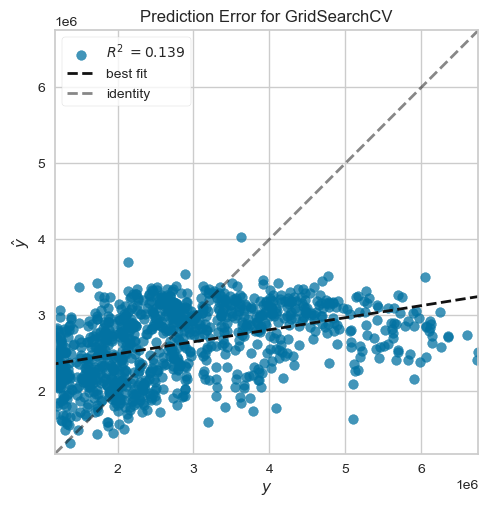

<Axes: title={'center': 'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [72]:
visualizer = PredictionError(svr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [56]:
# Plotting the residuals
from yellowbrick.regressor import ResidualsPlot

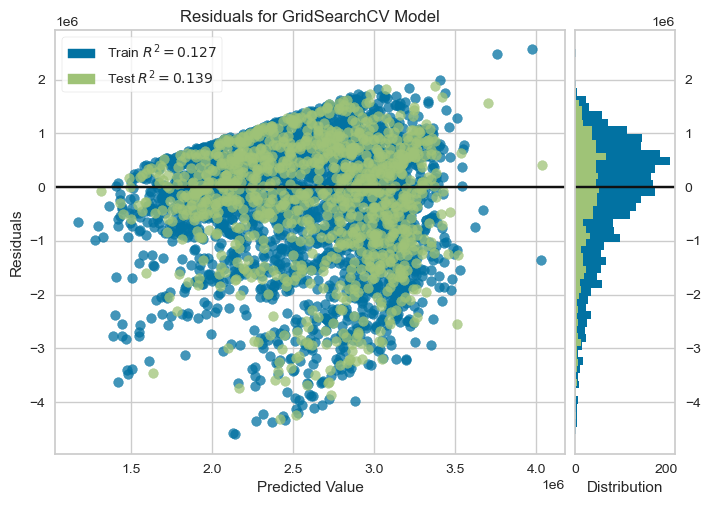

<Axes: title={'center': 'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [73]:
visualizer = ResidualsPlot(svr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [74]:
# Plotting the observed against the predicted flood area
import matplotlib.pyplot as plt

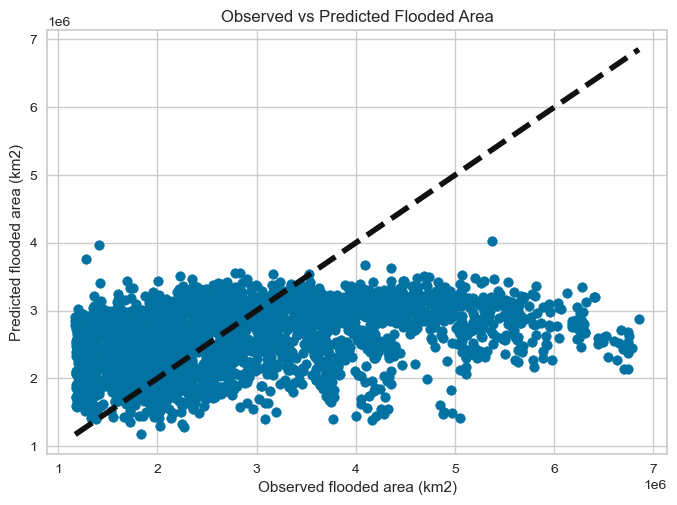

In [81]:
# For the training dataset
# Setteing the boundaries and characteristics
fig, ax = plt.subplots()
ax.scatter(y_train, svr_y_predtr)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],'k--',lw = 4)# Line of best fit
# Labelling
ax.set_xlabel("Observed flooded area (km2)")
ax.set_ylabel('Predicted flooded area (km2)')
plt.title('Training Observed vs Predicted Flooded Area')
plt.show()

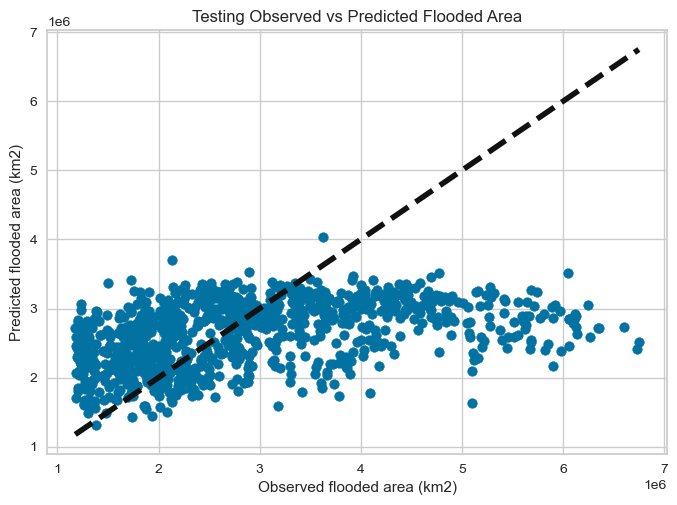

In [82]:
# For the testing dataset
# Setteing the boundaries and characteristics
fig, ax = plt.subplots()
ax.scatter(y_test, svr_y_predts)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k--',lw = 4)# Line of best fit
# Labelling
ax.set_xlabel("Observed flooded area (km2)")
ax.set_ylabel('Predicted flooded area (km2)')
plt.title('Testing Observed vs Predicted Flooded Area')
plt.show()

In [ ]:
# Plotting the obsevred and predicted flooded area

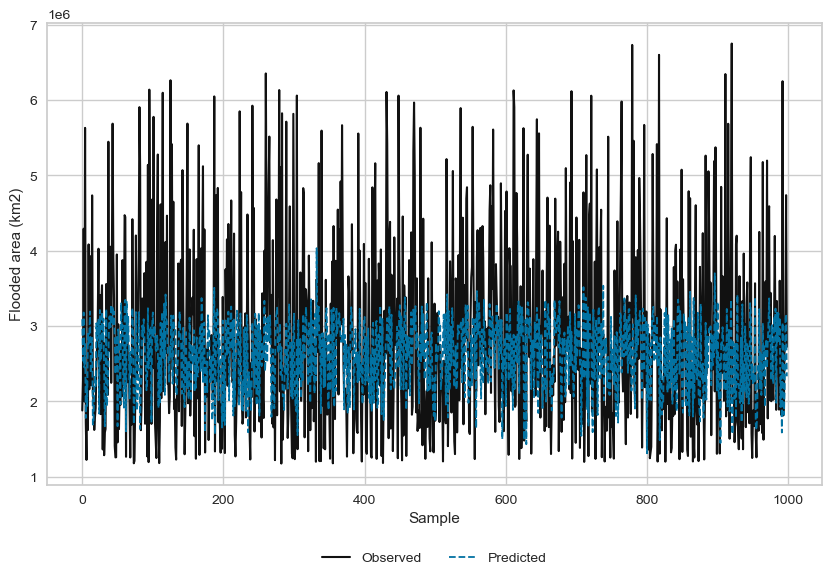

In [89]:
# Setting the boundaries and charactristics 
plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label = 'Observed', color = 'k', linestyle = '-', lw = 1.5)
plt.plot(x_ax, svr_y_predts, label = 'Predicted', color = 'b', linestyle = '--', lw = 1.3)
plt.ylabel('Flooded area (km2)')
plt.xlabel('Sample')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()